# Homework 9

## Instructions
+ Please write you solutions in cells below each problem. Use multiple cells if necessary. 
+ The solutions may be in the form of code, markdown, or a combination of both. Make an effort to present the solutions in a clean fashion.
+ Please submit this notebook in your git repository, under the folder `problemset`. The notebook should be titled `lastname_firstname_hw9.ipynb` (all lower case). 
+ All figures should be legible and clearly labelled. Please follow plotting conventions from HW 8.

### Problem 1: Quadratic functions (5 points)


 (Exercise 7.5 of Langtangen's book) Consider a quadratic function $f(x; a,b,c) = ax^2 + bx + c$. Your tasks are:
1.  Make a class `Quadratic` for representing $f$, where $a, b,$ and $c$ are data attributes, and the methods are

    + `__init__` for storing the attributes $a,b$, and $c$,
    + `value` for computing a value of $f$ at a point $x$,
    + `plot` for plotting the $f$ values in the interval $[L,R]$ at $n$ evenly spaced points,
    + `roots` for computing the two roots (possibly complex).
2. Write good docstrings to document the class `Quadratic`. Type `help(Quadratic)` to print the docstrings. 
3. Write a test function `testQuadratic()` for verifying the implementation of `value` and `roots`. Please generate several instances of quadratics and compare with `numpy.roots`.  


In [52]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [31]:
class Quadratic:
    '''
    The documentation for the class goes here.
    Make a class Qudratic for representing f with a, b and c
    '''
    def __init__ (self, a, b, c):
        '''
        parameters for the formula
        '''
        self.a = a
        self.b = b
        self.c = c
    
    def value(self,x):
        '''
        function of the formula
        '''
        return self.a*(x**2) + self.b*x + self.c
    
    def plot(self, L, R, n):
        '''
        plot the x to y by the formula above
        '''
        x0 = linspace(L,R,n)
        plt.plot(x=x0,y=self.a*(x0**2) + self.b*x0 + self.c)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('y=f(X)', fontsize=14)
        plt.title('X and f(X)', fontsize=18)
    
    def roots(self):
        '''
        find the roots of the function
        '''
        root1 = (-self.b + math.sqrt(self.b**2-4*self.a*self.c))/(2*self.a)
        root2 = (-self.b - math.sqrt(self.b**2-4*self.a*self.c))/(2*self.a)
        return root1, root2

In [32]:
help(Quadratic)

Help on class Quadratic in module __main__:

class Quadratic(builtins.object)
 |  Quadratic(a, b, c)
 |  
 |  The documentation for the class goes here.
 |  Make a class Qudratic for representing f with a, b and c
 |  
 |  Methods defined here:
 |  
 |  __init__(self, a, b, c)
 |      parameters for the formula
 |  
 |  plot(self, L, R, n)
 |      plot the x to y by the formula above
 |  
 |  roots(self)
 |      find the roots of the function
 |  
 |  value(self, x)
 |      function of the formula
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [35]:
def testQuadratic():
    t1 = Quadratic(1,4,3)
    t2 = Quadratic(-2,-6,3)
    print('When x is 4, the value is', t1.value(4))
    print('The roots of first function are', t1.roots())
    print('The roots of second function are', t2.roots())
testQuadratic()

When x is 4, the value is 35
The roots of first function are (-1.0, -3.0)
The roots of second function are (-3.4364916731037085, 0.4364916731037085)


In [34]:
coeff = [1,4,3]
print('The roots of first function are',np.roots(coeff))
coeff = [-2,-6,3]
print('The roots of second function are',np.roots(coeff))

The roots of first function are [-3. -1.]
The roots of second function are [-3.43649167  0.43649167]


### Problem 2: Derived classes (5 points) 

Write a base class called `Circle` with the following methods
+ `__init__` for storing attributes (radius, center)
+ `plot` for plotting the circle
+ `area`, for computing the area of the circle
+ `perimeter` for computing the perimeter of the circle


Then, using `Circle` as a base class, write a derived class called `Ellipse` with the same functionalities. An ellipse is defined by a center, $a$ semi-major axis, and $b$ semi-minor axis.

The area of an ellipse is $\pi a b$, whereas the perimeter of an ellipse is given by the approximate formula (from [wikipedia](https://en.wikipedia.org/wiki/Ellipse))
$$ \text{Perimeter} \approx \pi(a + b) \left( 1 + \frac{3h}{10 + \sqrt{4-3h}} \right) \qquad h = \frac{(a-b)^2 }{(a+b)^2}.$$

Is it better to derive `Ellipse` from `Circle` or vice versa? Briefly discuss.

In [79]:
class Circle:
    def __init__(self, radius, center):
        self.radius = radius
        self.center = center
    
    def plot(self):
        cir0 = plt.Circle(self.center, self.radius)
        fig, ax = plt.subplots()
        plt.xlim(self.center[0]-1.25*self.radius,self.center[0]+1.25*self.radius)
        plt.ylim(self.center[1]-1.25*self.radius,self.center[1]+1.25*self.radius)
        plt.xlabel('X', fontsize = 14)
        plt.ylabel('Y', fontsize = 14)
        plt.title('Circle', fontsize=18)
        ax.set_aspect(1)
        return ax.add_artist(cir0) 
    
    def area(self):
        return math.pi*self.radius**2
    
    def perimeter(self):
        return math.pi*self.radius*2 

28.274333882308138
18.84955592153876


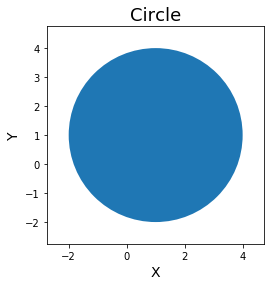

In [82]:
para = Circle(3,[1,1])
print(para.area())
print(para.perimeter())
para.plot()

In [83]:
class Ellipse(Circle):
    
    def __init__(self, a, b,center):
        self.a = a
        self.b = b
        self.center = center
    
    def plot(self):
        plt.figure()
        ax = plt.gca()
        ellipse = mpl.patches.Ellipse(self.center, self.a, self.b)
        ax.add_patch(ellipse)
        ax.set_aspect(1)
        plt.xlim(self.center[0]-self.a, self.center[0]+self.a)
        plt.ylim(self.center[1]-self.b, self.center[1]+self.b)
        plt.xlabel('x', fontsize = 14)
        plt.ylabel('y', fontsize = 14)
        plt.title('Ellipse', fontsize=18)
        
    
    def area(self):
        return math.pi*self.a*self.b
    
    def perimeter(self):
        h = (self.a - self.b)**2/ (self.a + self.b)**2
        return math.pi*(self.a + self.b)*(1 + 3*h/(10+math.sqrt(4-3*h)))

157.07963267948966
48.44224108065042


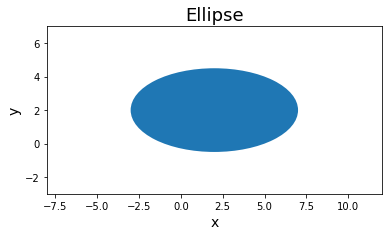

In [84]:
para = Ellipse(10,5,[2,2])
print(para.area())
print(para.perimeter())
para.plot()

I think ellipse is better as we can set the weight parameter to make the circle as one of the special ellipse. However, we cannot represent the ellipse by using circle. 

Thanks all your help this semester and thanks again for grading my worksheet1 again as I made the wrong submission as the first time. 